<a href="https://colab.research.google.com/github/abdullahkhaja/BrainTumor/blob/main/BrainTumorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rm1000/brain-tumor-mri-scans")

print("Path to dataset files:", path)

100%|██████████| 236M/236M [00:04<00:00, 54.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rm1000/brain-tumor-mri-scans/versions/1


In [3]:
import os
import numpy as np
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

class BrainTumorDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []

        # Loop through the directory and load image paths and labels
        for label, category in enumerate(os.listdir(root_dir)):
            category_path = os.path.join(root_dir, category)
            for img_name in os.listdir(category_path):
                img_path = os.path.join(category_path, img_name)
                self.images.append(img_path)
                self.labels.append(label)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')  # Convert to RGB

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]
        return image, label

# Define transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load the dataset
dataset = BrainTumorDataset(root_dir='/root/.cache/kagglehub/datasets/rm1000/brain-tumor-mri-scans/versions/1', transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Check the number of samples
print(f'Number of samples in dataset: {len(dataset)}')


Number of samples in dataset: 7023


In [4]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
import os
import numpy as np
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split

class BrainTumorDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []

        # Loop through the directory and load image paths and labels
        for label, category in enumerate(os.listdir(root_dir)):
            category_path = os.path.join(root_dir, category)
            for img_name in os.listdir(category_path):
                img_path = os.path.join(category_path, img_name)
                self.images.append(img_path)
                self.labels.append(label)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')  # Convert to RGB

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]
        return image, label

# Define transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load the dataset
dataset = BrainTumorDataset(root_dir='/root/.cache/kagglehub/datasets/rm1000/brain-tumor-mri-scans/versions/1', transform=transform)

# Set the random seed for reproducibility
torch.manual_seed(42)

# Define the size of the splits
train_size = int(0.7 * len(dataset))  # 70% for training
val_size = int(0.15 * len(dataset))  # 15% for validation
test_size = len(dataset) - train_size - val_size  # 15% for testing

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Check the sizes of the splits
print(f'Train size: {len(train_dataset)}, Validation size: {len(val_dataset)}, Test size: {len(test_dataset)}')


Train size: 4916, Validation size: 1053, Test size: 1054


In [6]:
# Initialize lists to store labels and images
all_labels = []
all_images = []

# Load the dataset and populate all_labels and all_images
for label in dataset.labels:
    all_labels.append(label)

for img_path in dataset.images:
    img = Image.open(img_path).convert('RGB')
    all_images.append(img)


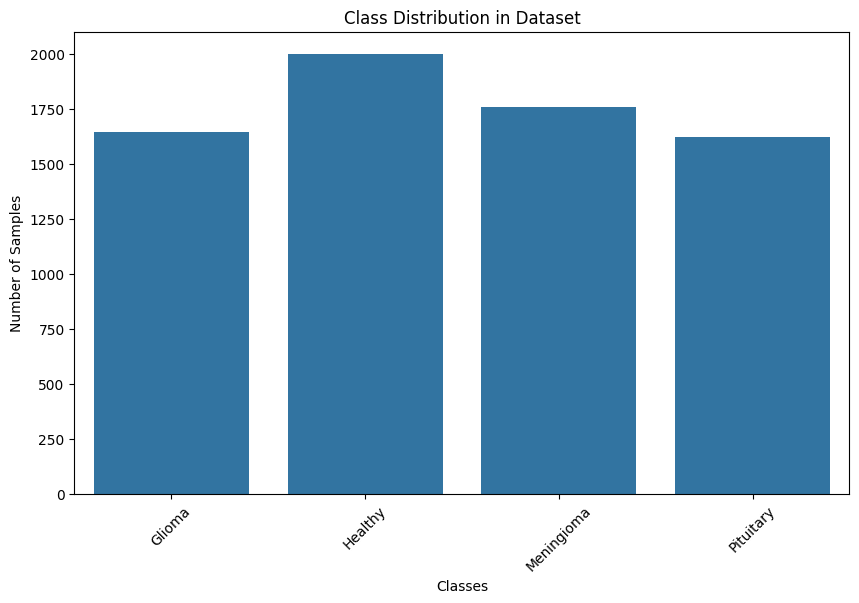

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Class names corresponding to your dataset labels
class_names = ['Glioma', 'Healthy', 'Meningioma', 'Pituitary']

# Assuming `labels` is a list or array of your dataset labels
class_labels, counts = np.unique(all_labels, return_counts=True)

# Map numerical labels to class names
class_labels_names = [class_names[label] for label in class_labels]

plt.figure(figsize=(10, 6))
sns.barplot(x=class_labels_names, y=counts)
plt.title('Class Distribution in Dataset')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


In [14]:
class_names = ['Glioma', 'Healthy', 'Meningioma', 'Pituitary']


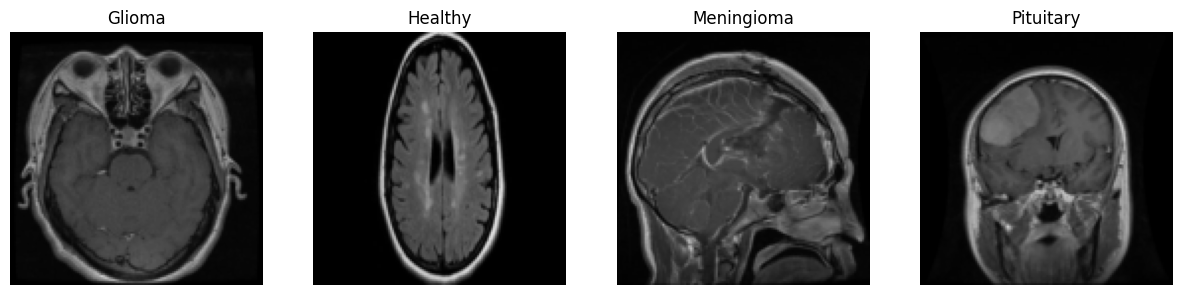

In [17]:
import random
def show_sample_images(dataset, class_names):
    plt.figure(figsize=(15, 10))
    sampled_indices = {name: None for name in class_names}

    # Loop until we have one image from each class
    for idx in range(len(dataset)):
        image, label = dataset[idx]
        if sampled_indices[class_names[label]] is None:  # Check if we already have an image for this class
            sampled_indices[class_names[label]] = (image, class_names[label])  # Store image and class name

        # Stop if we have one image for each class
        if all(sampled_indices.values()):
            break

    for i, (image, class_name) in enumerate(sampled_indices.values()):
        # Convert the tensor back to a NumPy array and denormalize
        image = image.permute(1, 2, 0).numpy()  # Change tensor shape for plotting
        image = (image * 0.5 + 0.5)  # Denormalize to [0, 1]
        image = np.clip(image, 0, 1)  # Ensure values are in the valid range

        plt.subplot(1, len(class_names), i + 1)
        plt.imshow(image)
        plt.title(class_name)  # Use class name here
        plt.axis('off')

    plt.show()

# Call the function to show one image per class
show_sample_images(dataset, class_names)


In [8]:
import torch
import torch.nn as nn

class BrainTumorClassifier(nn.Module):
    """
    BrainTumorClassifier architecture for classifying brain tumor MRI images.
    A compact version of the VGG architecture suitable for smaller datasets or resource-constrained environments.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 32 * 32,  # Adjust according to your input size
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

# Define the model
input_shape = 3  # RGB images
hidden_units = 32  # You can adjust this as needed
output_shape = 4  # Number of classes: glioma, healthy, meningioma, pituitary

torch.manual_seed(42)
model = BrainTumorClassifier(input_shape=input_shape, hidden_units=hidden_units, output_shape=output_shape).to(device)
print(model)


BrainTumorClassifier(
  (block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=32768, out_features=4, bias=True)
  )
)


In [9]:
from tqdm import tqdm

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the model
input_shape = 3  # RGB images
hidden_units = 32
output_shape = 4  # Number of classes
model = BrainTumorClassifier(input_shape=input_shape, hidden_units=hidden_units, output_shape=output_shape).to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}", leave=False)

    for images, labels in train_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item()

        # Update progress bar
        train_bar.set_postfix(loss=running_loss / (train_bar.n + 1))  # Average loss

    # Calculate average training loss
    avg_train_loss = running_loss / len(train_loader)

    # Validate the model
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    val_bar = tqdm(val_loader, desc="Validating", leave=False)

    with torch.no_grad():
        for images, labels in val_bar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = correct / total

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {avg_train_loss:.4f}, '
          f'Validation Loss: {avg_val_loss:.4f}, '
          f'Validation Accuracy: {val_accuracy:.4f}')

# After training, you can evaluate on the test set
model.eval()
test_loss = 0.0
correct = 0
total = 0
test_bar = tqdm(test_loader, desc="Testing", leave=False)

with torch.no_grad():
    for images, labels in test_bar:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

avg_test_loss = test_loss / len(test_loader)
test_accuracy = correct / total

print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch [1/10], Train Loss: 0.8947, Validation Loss: 0.6870, Validation Accuracy: 0.7284


Epoch [2/10], Train Loss: 0.5294, Validation Loss: 0.5103, Validation Accuracy: 0.8300


Epoch [3/10], Train Loss: 0.3941, Validation Loss: 0.4151, Validation Accuracy: 0.8433


Epoch [4/10], Train Loss: 0.3024, Validation Loss: 0.3427, Validation Accuracy: 0.8870


Epoch [5/10], Train Loss: 0.2126, Validation Loss: 0.3563, Validation Accuracy: 0.8585


Epoch [6/10], Train Loss: 0.1698, Validation Loss: 0.3470, Validation Accuracy: 0.8917


Epoch [7/10], Train Loss: 0.1021, Validation Loss: 0.3252, Validation Accuracy: 0.9003


Epoch [8/10], Train Loss: 0.0680, Validation Loss: 0.3543, Validation Accuracy: 0.9107


Epoch [9/10], Train Loss: 0.0533, Validation Loss: 0.3615, Validation Accuracy: 0.9164


Epoch [10/10], Train Loss: 0.0339, Validation Loss: 0.4298, Validation Accuracy: 0.9326


Test Loss: 0.2610, Test Accuracy: 0.9412


In [20]:
# Extracted data from your log
epochs = list(range(1, 11))  # From 1 to 10

train_losses = [
    0.8947, 0.5294, 0.3941, 0.3024, 0.2126,
    0.1698, 0.1021, 0.0680, 0.0533, 0.0339
]

val_losses = [
    0.6870, 0.5103, 0.4151, 0.3427, 0.3563,
    0.3470, 0.3252, 0.3543, 0.3615, 0.4298
]

val_accuracies = [
    0.7284, 0.8300, 0.8433, 0.8870, 0.8585,
    0.8917, 0.9003, 0.9107, 0.9164, 0.9326
]


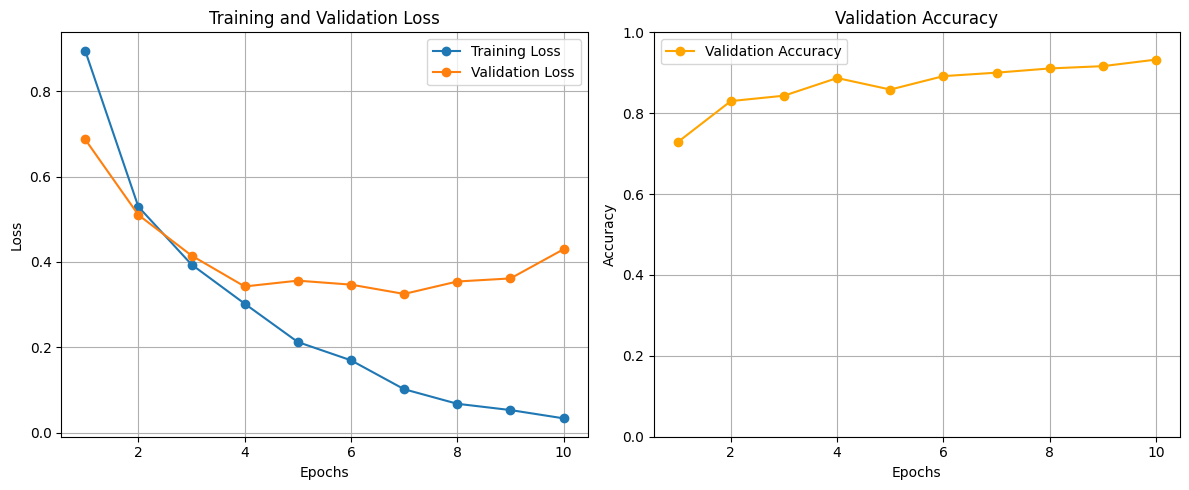

In [25]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o', color='orange')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()


In [10]:
import torch
# After training, save the model
model_save_path = 'brain_tumor_classification_model.pth'
torch.save({
    'epoch': num_epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}, model_save_path)

print(f'Model saved to {model_save_path}')


Model saved to brain_tumor_classification_model.pth


In [11]:
from tqdm import tqdm
loaded_model = BrainTumorClassifier(input_shape=input_shape, hidden_units=hidden_units, output_shape=output_shape).to(device)
checkpoint = torch.load(model_save_path, weights_only=True)
loaded_model.load_state_dict(checkpoint['model_state_dict'])
loaded_model.eval()  # Set the model to evaluation mode

# Testing the model on the test dataset
test_loss = 0.0
correct = 0
total = 0
test_bar = tqdm(test_loader, desc="Testing", leave=False)
criterion = nn.CrossEntropyLoss()
with torch.no_grad():
    for images, labels in test_bar:
        images, labels = images.to(device), labels.to(device)
        outputs = loaded_model(images)  # Use the loaded model
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate average test loss and accuracy
avg_test_loss = test_loss / len(test_loader)
test_accuracy = correct / total

print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.2610, Test Accuracy: 0.9412


In [18]:
# Convert tensors to NumPy for easier manipulation
predictions = predicted.cpu().numpy()
true_labels = labels.cpu().numpy()

# Compare predictions with true labels
correct_predictions = predictions == true_labels
accuracy = np.mean(correct_predictions)  # Calculate accuracy

# Print accuracy
print(f'Accuracy for this batch: {accuracy * 100:.2f}%')




Accuracy for this batch: 90.00%


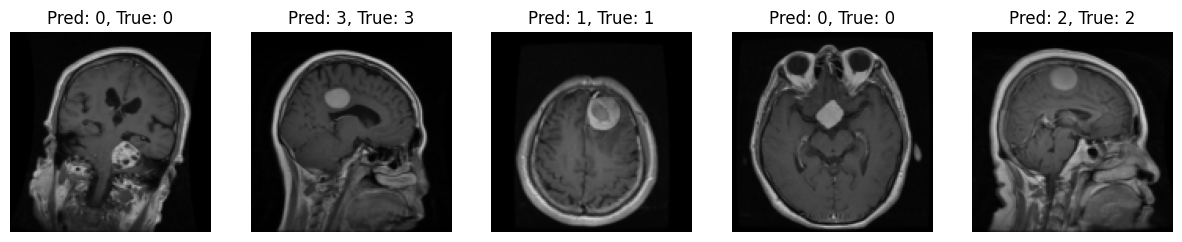

In [13]:
import matplotlib.pyplot as plt

# Function to visualize predictions
def visualize_predictions(dataset, predictions, true_labels, num_samples=5):
    plt.figure(figsize=(15, 5))
    indices = np.random.choice(len(predictions), num_samples, replace=False)

    for i, idx in enumerate(indices):
        img, _ = dataset[idx]  # Get the image
        img = img.permute(1, 2, 0).numpy()  # Change tensor shape for plotting
        img = (img * 0.5 + 0.5)  # Denormalize

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f'Pred: {predictions[idx]}, True: {true_labels[idx]}')
        plt.axis('off')

    plt.show()

# Example usage
visualize_predictions(dataset, predictions, true_labels)


Test Loss: 0.2610, Test Accuracy: 0.9412


<Figure size 800x600 with 0 Axes>

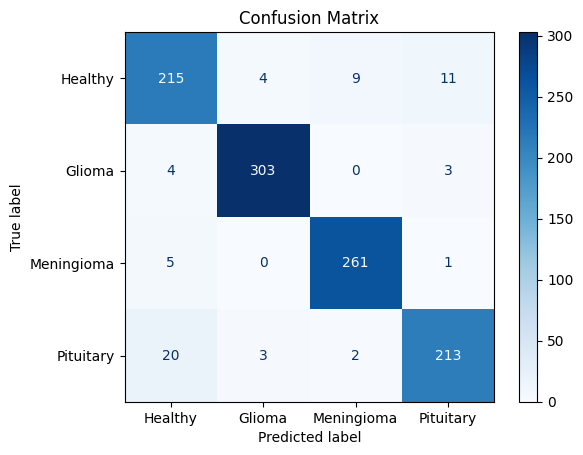

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Define class names
class_names = ['Healthy', 'Glioma', 'Meningioma', 'Pituitary']

# Testing the model on the test dataset
test_loss = 0.0
correct = 0
total = 0
test_bar = tqdm(test_loader, desc="Testing", leave=False)

all_predictions = []
all_labels = []

with torch.no_grad():
    for images, labels in test_bar:
        images, labels = images.to(device), labels.to(device)
        outputs = loaded_model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Store predictions and labels
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate average test loss and accuracy
avg_test_loss = test_loss / len(test_loader)
test_accuracy = correct / total

print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Create confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')  # You can adjust the colormap and value format
plt.title('Confusion Matrix')
plt.show()


In [16]:
from sklearn.metrics import f1_score, classification_report

# Prepare for evaluation
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, labels in test_loader:  # Use your test_loader
        images, labels = images.to(device), labels.to(device)
        outputs = loaded_model(images)
        _, predicted = torch.max(outputs.data, 1)

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Calculate metrics
f1 = f1_score(all_labels, all_predictions, average='weighted')
print(f'F1 Score: {f1:.4f}')
print(classification_report(all_labels, all_predictions))


F1 Score: 0.9411
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       239
           1       0.98      0.98      0.98       310
           2       0.96      0.98      0.97       267
           3       0.93      0.89      0.91       238

    accuracy                           0.94      1054
   macro avg       0.94      0.94      0.94      1054
weighted avg       0.94      0.94      0.94      1054

